# **DATA SCIENCE COHORT 2 FINAL PROJECT**
## **Capstone Project: Predictive Modelling for COVID-19 Using The Day Wise Dataset**
#### **NAME: UZOMA COLLINS ARINZE**
#### **NO: FE/23/62774891**

## **This Dataset Offers A Day By Day Overview Of The COVID-19 Virus**

## **Case Scenario**
In response to the COVID-19 pandemic, public health organizations have faced
immense challenges in predicting the spread of the virus and understanding key
factors that influence transmission and patient outcomes. Imagine you have been
hired as a data scientist by a public health organization, "HealthGuard Analytics," to
build a predictive modeling system. The organization requires actionable insights to
inform policies, anticipate future outbreaks, and improve health resource allocation.
Using historical COVID-19 data, you will conduct data cleaning, perform exploratory
data analysis (EDA), and develop predictive models to forecast COVID-19 trends.
You will present your findings through visualizations and provide a final report
summarizing insights and recommendations for public health responses.

In [1]:
# import all needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the dataset
data = pd.read_csv(r"C:\Users\COLLINS\Desktop\3MTT FINAL PROJECT\datasets\day_wise.csv")

## **1. Understand The Data Structure**

In [3]:
# Shape of dataset
# print(f"The dataset has {data.shape[1]} columns and {data.shape[0]} rows")
print("The number of columns is: ", data.shape[1])
print("The number of rows is: ", data.shape[0])

The number of columns is:  12
The number of rows is:  188


In [4]:
# Display the first few rows and summary information of the dataset to understand its structure
data.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [5]:
# Display the first few rows and summary information of the dataset to understand its structure
data.tail()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187
187,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187


In [6]:
# Check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


We can see here, that the dataset has int and float values, except for the **Date** column which will later be converted to datetime for our analysis

In [7]:
# Statistical Summary
data.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000


In [8]:
# Date range of the dataset
print("Date Range: ", data['Date'].min(), " to ", data['Date'].max())

Date Range:  2020-01-22  to  2020-07-27


##### **The Date ranges from 22 January, 2020 to 27 July, 2020**

## **2. Check For Mising Values**

In [9]:
# Check for mising values
data.isnull().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

We can see that the dataset has no missing values.

## **3. Date Column Analysis**

In [10]:
date_column = data['Date']

# Convert 'Date' column to datetime format
date_column = pd.to_datetime(date_column, errors='coerce')
data['Date'] = date_column

# Set the date column as the index
data.set_index('Date', inplace=True)

In [11]:
# Check data info again to confirm Date format
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2020-01-22 to 2020-07-27
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Confirmed               188 non-null    int64  
 1   Deaths                  188 non-null    int64  
 2   Recovered               188 non-null    int64  
 3   Active                  188 non-null    int64  
 4   New cases               188 non-null    int64  
 5   New deaths              188 non-null    int64  
 6   New recovered           188 non-null    int64  
 7   Deaths / 100 Cases      188 non-null    float64
 8   Recovered / 100 Cases   188 non-null    float64
 9   Deaths / 100 Recovered  188 non-null    float64
 10  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 17.6 KB


In [12]:
# Data head
data.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
Date,,,,,,,,,,,
2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


We can see that our format is in order and the **Date** column is now our index for future analysis

## **4. Univariant Analysis**

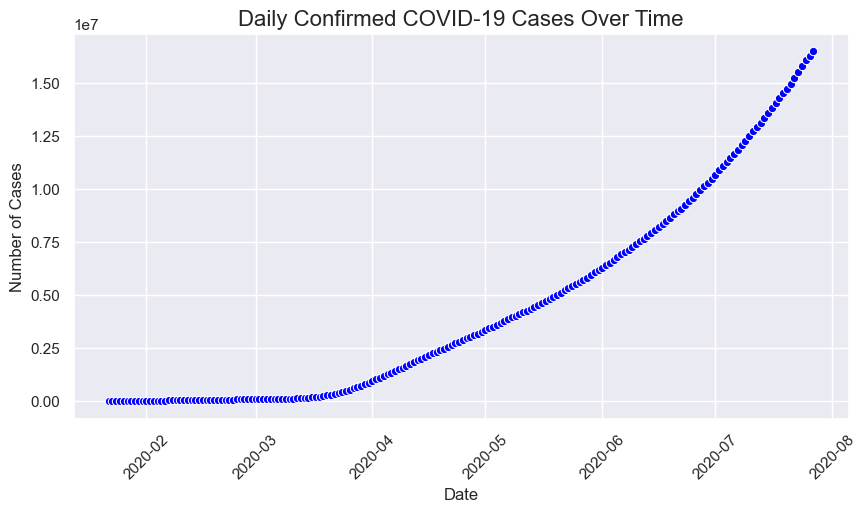

In [13]:
# Daily Trends: Confirmed Cases Over Time
daily_trends = data.groupby("Date")["Confirmed"].sum()

plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid")
sns.lineplot(data=daily_trends, marker="o", color="blue")
plt.title("Daily Confirmed COVID-19 Cases Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45)
plt.show()

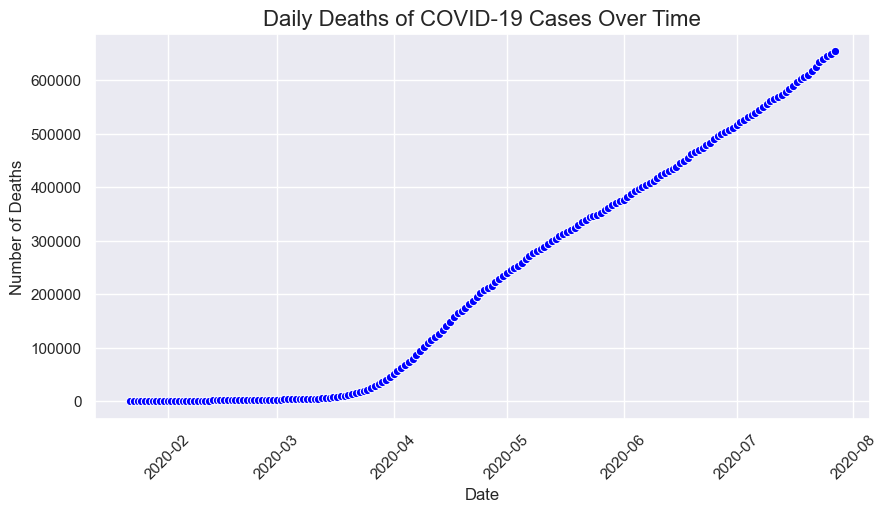

In [14]:
# Daily Trends: Confirmed Cases Over Time
daily_trends = data.groupby("Date")["Deaths"].sum()

plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid")
sns.lineplot(data=daily_trends, marker="o", color="blue")
plt.title("Daily Deaths of COVID-19 Cases Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Deaths", fontsize=12)
plt.xticks(rotation=45)
plt.show()

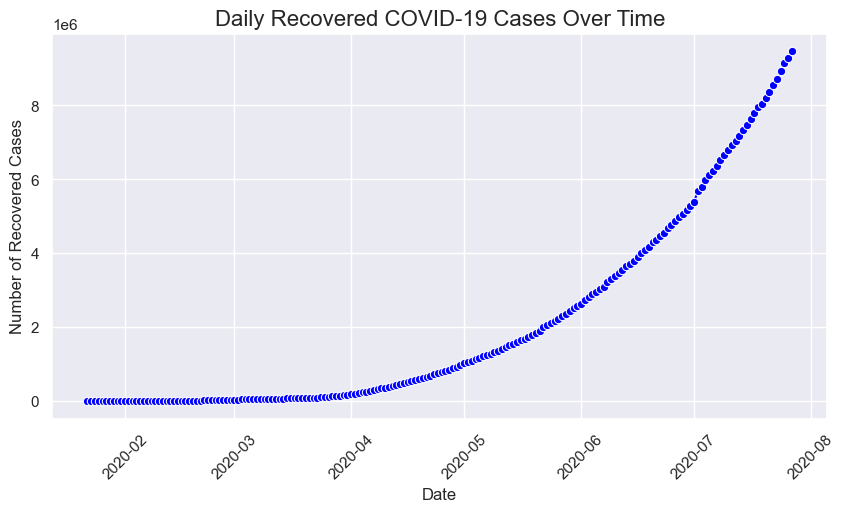

In [15]:
# Daily Trends: Confirmed Cases Over Time
daily_trends = data.groupby("Date")["Recovered"].sum()

plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid")
sns.lineplot(data=daily_trends, marker="o", color="blue")
plt.title("Daily Recovered COVID-19 Cases Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Recovered Cases", fontsize=12)
plt.xticks(rotation=45)
plt.show()

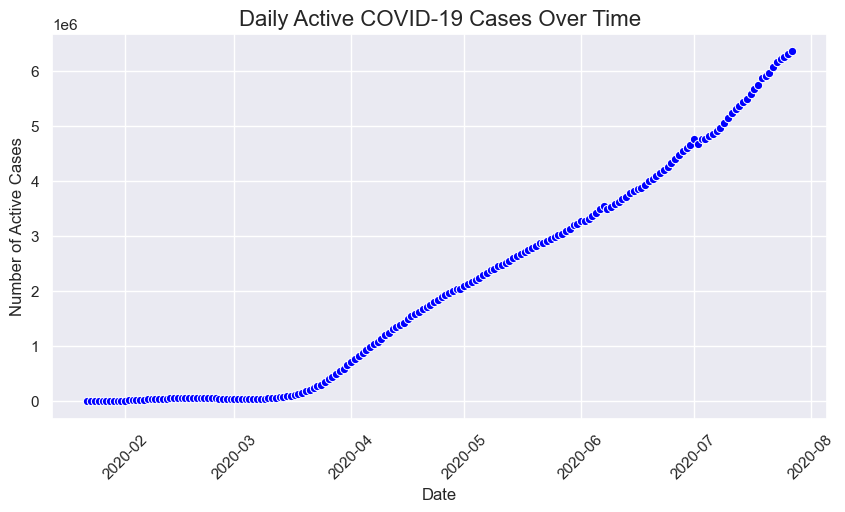

In [16]:
# Daily Trends: Confirmed Cases Over Time
daily_trends = data.groupby("Date")["Active"].sum()

plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid")
sns.lineplot(data=daily_trends, marker="o", color="blue")
plt.title("Daily Active COVID-19 Cases Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Active Cases", fontsize=12)
plt.xticks(rotation=45)
plt.show()

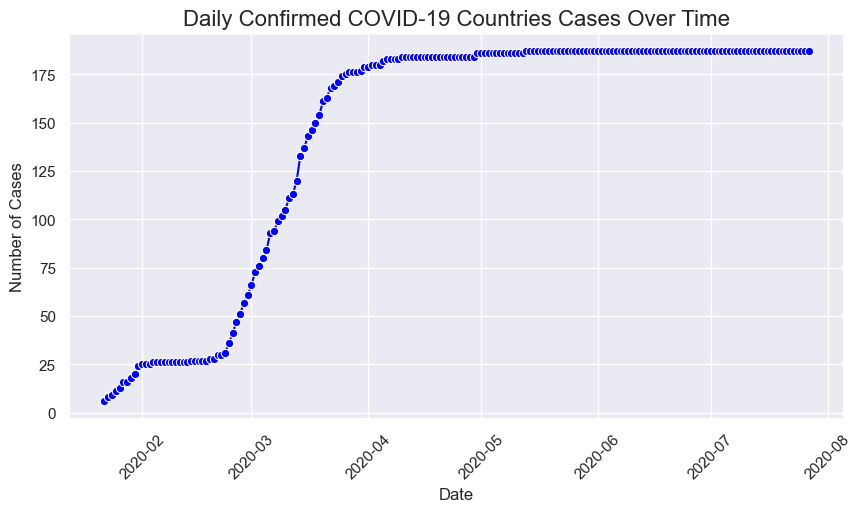

In [17]:
# Daily Trends: Number of Countries Affected Per Day
daily_trends = data.groupby("Date")["No. of countries"].sum()

plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid")
sns.lineplot(data=daily_trends, marker="o", color="blue")
plt.title("Daily Confirmed COVID-19 Countries Cases Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Insights

The plots above highlight a significant trend in the progression of Confirmed, Active, Recovered, and Death cases of the COVID-19 pandemic, with notable exponential increases beginning in April 2020. A closer look at the data reveals several key observations:

1. **Active Cases**:  
   The number of Active cases began to rise earlier, specifically from mid-March 2020. This early surge can likely be attributed to the delayed distribution of vaccines in several countries, which allowed the virus to spread more rapidly before containment measures could be fully implemented.

2. **Confirmed Cases**:  
   The overall number of Confirmed cases followed a similar trajectory, with a sharp increase seen in April 2020. This aligns with the general global spread of the virus and indicates the period when testing capacities and case reporting began to expand in many regions.

3. **Deaths**:  
   Deaths also started to rise around mid-March 2020, coinciding with the increase in Active cases. This suggests a direct relationship between the two metrics, where a surge in Active cases often led to an increase in the number of fatalities. The trend emphasizes the severity of the virus, particularly when healthcare systems were overwhelmed, and treatments were not yet fully effective.

4. **Correlation Between Active Cases and Deaths**:  
   The data shows a strong correlation between Active cases and Deaths. As Active cases surged, there was a parallel rise in the number of Deaths, indicating that the more individuals who were actively infected, the higher the likelihood of fatal outcomes. This could be due to factors such as the strain on healthcare resources, the severity of infections, and the lack of widespread vaccinations during the early stages of

5. **Date with No. od Countries Been Affected**:
   We can see that late february, there was an exponential rise in the number of countries been affected around the world.  the pandemic.

These insights reinforce the critical importance of timely intervention, vaccination efforts, and healthcare preparedness to mitigate the impact of future waves of infection. The data suggests that controlling the spread of the virus and managing the number of Active cases is key to reducing mortality rates during pandemics.


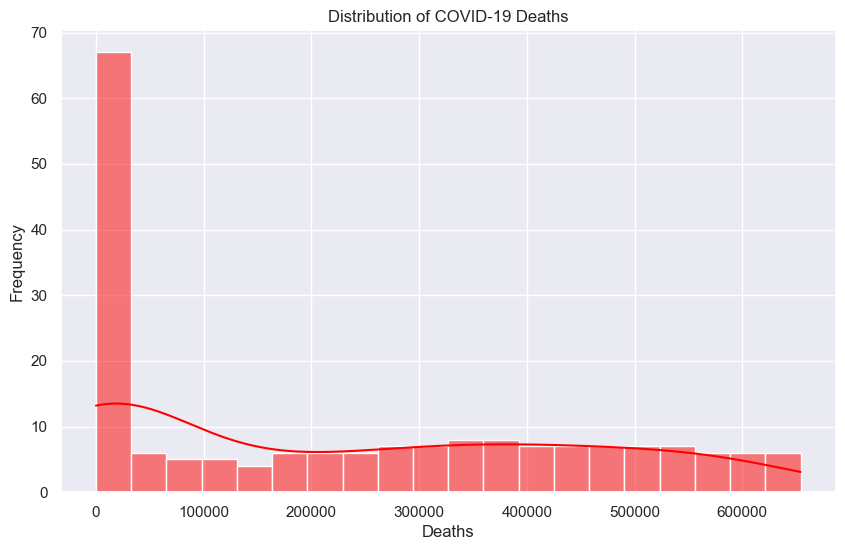

In [18]:
# Univariate Analysis for Deaths
plt.figure(figsize=(10, 6))
sns.histplot(data['Deaths'], bins=20, kde=True, color='red')
plt.title('Distribution of COVID-19 Deaths')
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.show()

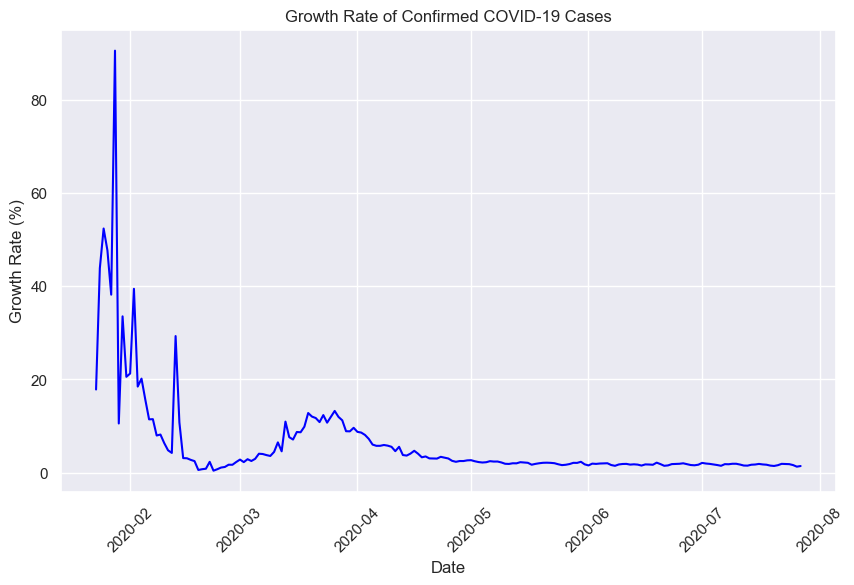

In [19]:
# Growth Rate for Confirmed Cases (Percent change per day)
data['Confirmed_Growth_Rate'] = data['Confirmed'].pct_change() * 100
plt.figure(figsize=(10, 6))
sns.lineplot(x=data.index, y=data['Confirmed_Growth_Rate'], color='blue')
plt.title('Growth Rate of Confirmed COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.show()

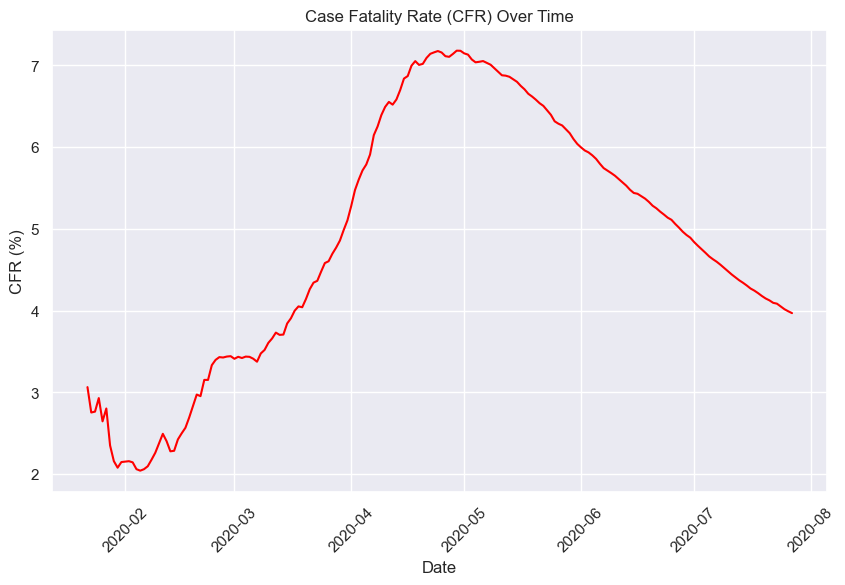

In [20]:
# Calculate Case Fatality Rate (CFR)
data['CFR'] = (data['Deaths'] / data['Confirmed']) * 100
plt.figure(figsize=(10, 6))
sns.lineplot(x=data.index, y=data['CFR'], color='red')
plt.title('Case Fatality Rate (CFR) Over Time')
plt.xlabel('Date')
plt.ylabel('CFR (%)')
plt.xticks(rotation=45)
plt.show()

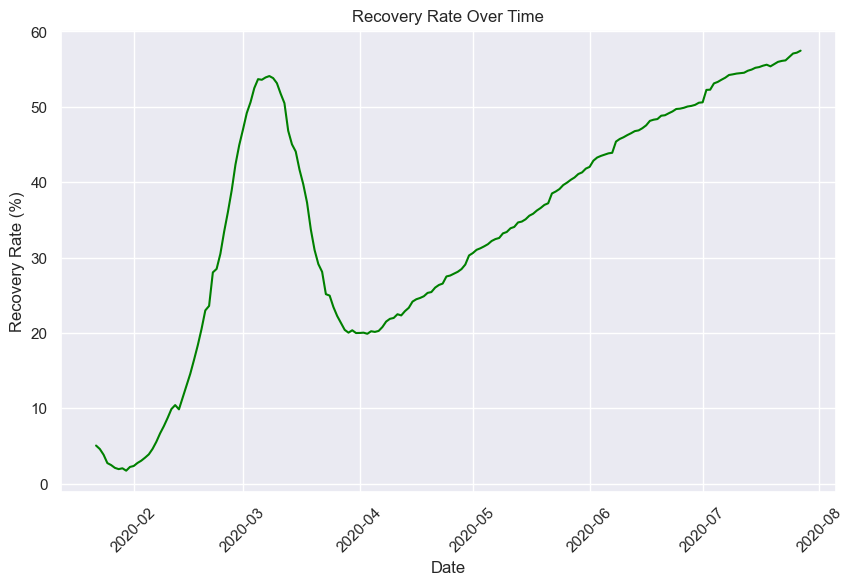

In [21]:
# Calculate Recovery Rate
data['Recovery_Rate'] = (data['Recovered'] / data['Confirmed']) * 100
plt.figure(figsize=(10, 6))
sns.lineplot(x=data.index, y=data['Recovery_Rate'], color='green')
plt.title('Recovery Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Recovery Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Univariate Analysis Insights on COVID-19 Data

This analysis explores the distribution and trends of key COVID-19 variables, including confirmed cases, deaths, recoveries, and active cases. The insights are derived from the following visualizations:

## 1. Distribution of Confirmed COVID-19 Cases (Histogram)
- **Insight**: The histogram shows the distribution of confirmed COVID-19 cases over time.
    - If the distribution is skewed to the right (positively skewed), it suggests that while most days had relatively low numbers of confirmed cases, some days had very high counts.
    - A more uniform or bell-shaped distribution may suggest an even spread of cases.
- **Interpretation**: A right-skewed distribution often indicates an exponential or rapid increase in cases, common during outbreaks or peak periods of the pandemic.

## 2. Growth Rate of Confirmed COVID-19 Cases (Line Plot)
- **Insight**: The line plot displays the daily growth rate of confirmed COVID-19 cases as a percentage change from the previous day.
    - Sharp upward spikes indicate rapid growth on certain days, while sharp downward trends suggest slow or stable periods.
- **Interpretation**: High positive growth rates indicate a rapid increase in cases, usually observed during pandemic surges. A downward or flat growth rate indicates stabilization or reduction in case numbers, potentially due to control measures like lockdowns.

## 3. Distribution of COVID-19 Deaths (Histogram)
- **Insight**: This histogram shows the distribution of deaths throughout the dataset period.
    - A right-skewed distribution suggests that most deaths occurred on certain days, with some days having higher death tolls.
    - A more evenly spread distribution would suggest a consistent number of deaths across the timeline.
- **Interpretation**: A skewed distribution might indicate a concentrated period of high mortality, often during waves of infections. A uniform distribution indicates deaths were more evenly distributed throughout the time period.

## 4. Case Fatality Rate (CFR) Over Time (Line Plot)
- **Insight**: This plot shows the Case Fatality Rate (CFR), which is the ratio of deaths to confirmed cases, over time.
    - Fluctuations in the line suggest varying fatality rates during different periods.
    - A rising CFR could signal worsening medical conditions or healthcare system strain.
- **Interpretation**: Fluctuations in CFR may reflect the varying severity of the disease or healthcare capacity challenges. A decrease in CFR could indicate improvements in medical treatments or interventions, while an increase might highlight overwhelmed healthcare systems.

## 5. Distribution of COVID-19 Recoveries (Histogram)
- **Insight**: The histogram displays the distribution of recoveries over time.
    - A left-skewed distribution suggests that recoveries were fewer than confirmed cases, while a right-skewed distribution indicates that most confirmed cases recovered.
- **Interpretation**: A large number of recoveries relative to deaths is a positive indicator of effective treatment and recovery processes. Conversely, a lower recovery count could signal a healthcare system under strain.

## 6. Recovery Rate Over Time (Line Plot)
- **Insight**: The recovery rate, calculated as the ratio of recoveries to confirmed cases, is shown over time.
    - A high recovery rate indicates good healthcare management and patient outcomes.
    - Fluctuations in the line suggest variability in recovery rates over time, possibly due to changing treatment efficacy or healthcare system strain.
- **Interpretation**: A consistently high recovery rate signals effective treatment and management. A low or fluctuating recovery rate may indicate challenges in the healthcare system or emerging issues with treatment.

## 7. Distribution of Active COVID-19 Cases (Histogram)
- **Insight**: This histogram shows the distribution of active cases, or cases that have not yet recovered or resulted in death.
    - A high concentration of active cases suggests ongoing transmission or slow recovery rates.
    - A lower number of active cases could indicate fewer infections or improvements in the recovery rate.
- **Interpretation**: A high number of active cases during certain periods indicates sustained transmission and a heavy ongoing burden on the healthcare system. A low count suggests the situation may be improving.


### Summary of Insights:
- **Confirmed Cases**: The distribution and growth rate provide insights into how quickly the pandemic spread. A right-skewed distribution suggests a rapid rise in cases, while a decreasing growth rate indicates a reduction in new cases.
- **Deaths**: The distribution and CFR help understand the mortality trends and the effectiveness of public health measures.
- **Recoveries**: The distribution of recoveries and recovery rate indicate how effectively patients are recovering, with a high recovery rate being a positive sign of medical management.
- **Active Cases**: The active case distribution and boxplot reveal ongoing transmission trends and potential healthcare strain, with fluctuations pointing to periods of significant outbreak.

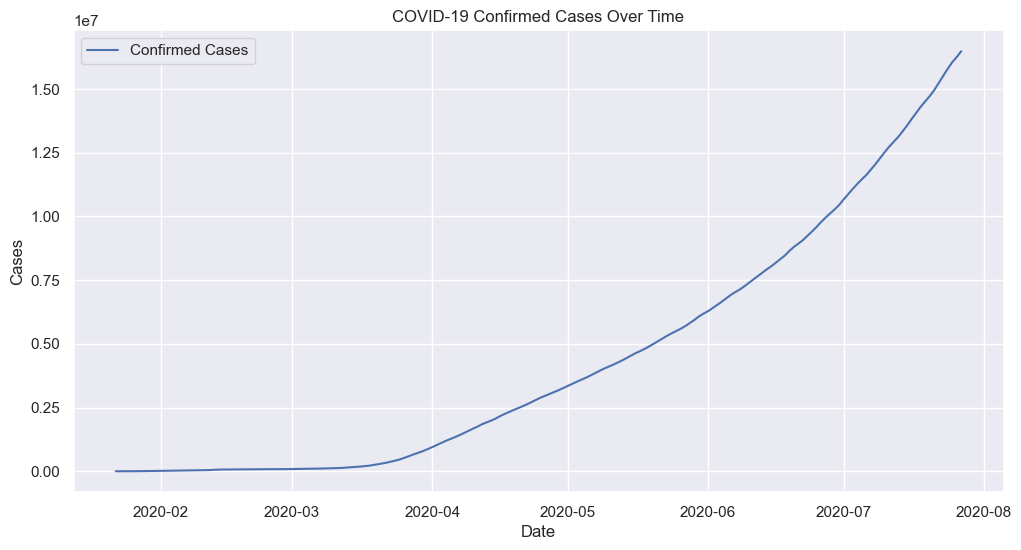

In [22]:
confirmed_cases = data['Confirmed']
plt.figure(figsize=(12, 6))
plt.plot(confirmed_cases, label="Confirmed Cases")
plt.title("COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()

In [23]:
data.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,Confirmed_Growth_Rate,CFR,Recovery_Rate
Date,,,,,,,,,,,,,,
2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6,NaN,3.063063,5.045045
2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8,17.837838,2.752294,4.587156
2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9,43.883792,2.763018,3.825717
2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,52.391073,2.928870,2.719665
2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,47.698745,2.644004,2.455146


## **5. Model Development**

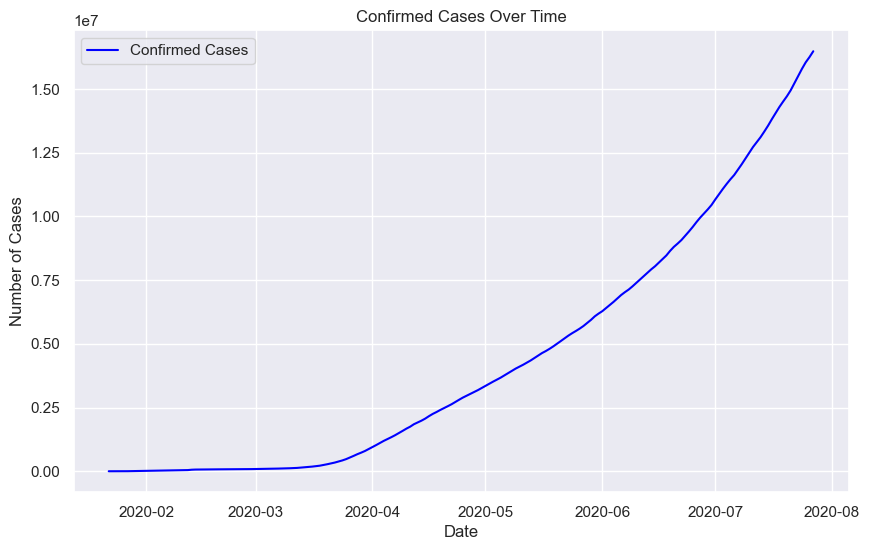

In [24]:
from math import sqrt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Prepare data for Prophet

# Reset the index so 'Date' becomes a column
data.reset_index(inplace=True)

# Rename the index back to 'Date' for clarity
data.rename(columns={'index': 'Date'}, inplace=True)

data.sort_values('Date', inplace=True)
prophet_data = data[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Confirmed Cases', color='blue')
plt.title("Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

In [25]:
# Split the data
train_size = int(len(prophet_data) * 0.8)
train = prophet_data[:train_size]
test = prophet_data[train_size:]

In [26]:
# Initialize and fit the model
model = Prophet()
model.fit(train)

07:27:49 - cmdstanpy - INFO - Chain [1] start processing
07:27:54 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
# Make predictions for the test set
future = model.make_future_dataframe(periods=len(test), freq='D')  # Include test set dates
forecast = model.predict(future)

# Extract predictions
test_forecast = forecast[['ds', 'yhat']].iloc[train_size:]  # Predictions for test dates

# Evaluate the model
rmse = sqrt(mean_squared_error(test['y'], test_forecast['yhat']))
print(f"RMSE: {rmse}")

RMSE: 1811713.5553519279


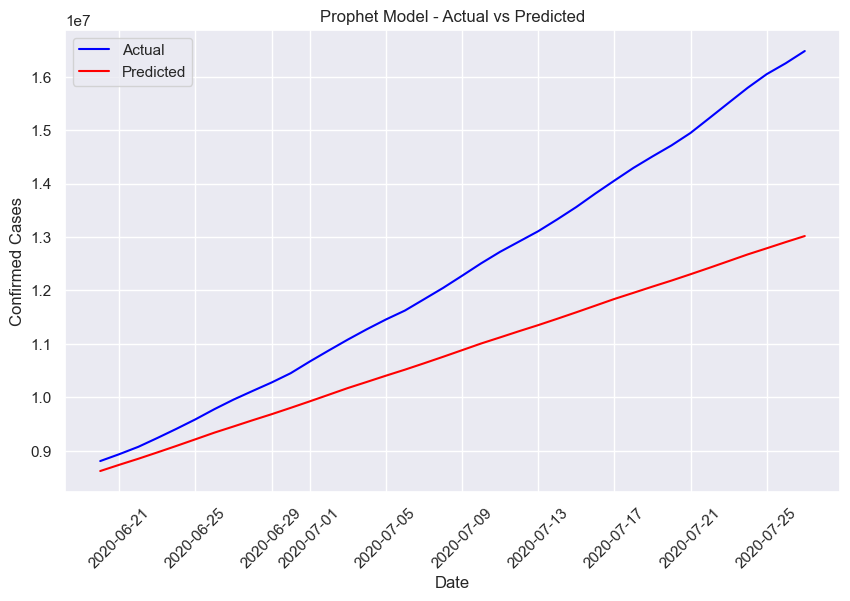

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Predicted', color='red')
plt.title("Prophet Model - Actual vs Predicted")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

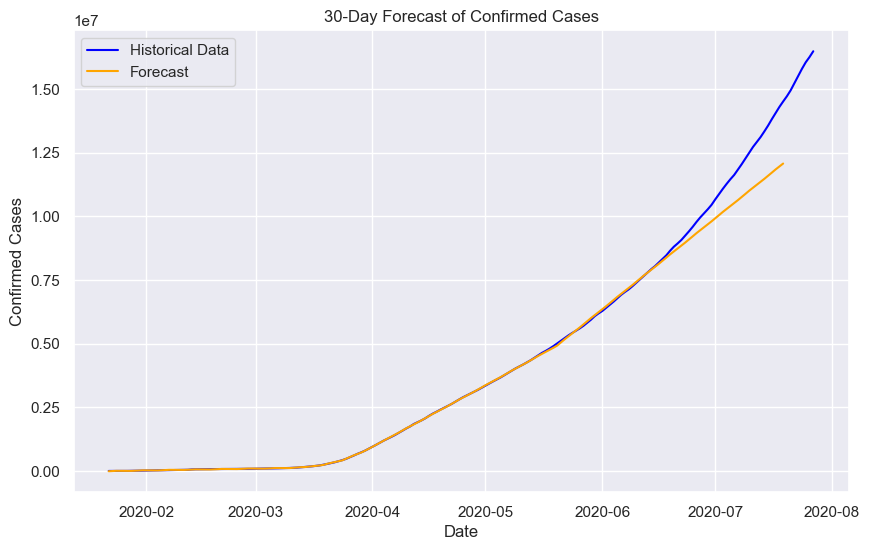

In [29]:
# Forecast future cases (e.g., next 30 days)
future_steps = 30
future_forecast = model.make_future_dataframe(periods=future_steps, freq='D')
forecast = model.predict(future_forecast)

# Extract and visualize future forecast
plt.figure(figsize=(10, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Historical Data', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
plt.title("30-Day Forecast of Confirmed Cases")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

# Insights from Prophet Model Predictions on COVID-19 Day-wise Dataset

## 1. Overall Trend Analysis
- **Historical Trend:**
  - The Prophet model effectively captures the overall growth in confirmed cases.
  - Initially, there is an **exponential increase** in cases, followed by a **slowing growth rate** towards the latter part of the dataset. 
  - Inflection points indicate significant changes in the pandemic trajectory, possibly due to public health interventions like lockdowns or mass vaccination efforts.

- **Future Trend:**
  - The forecast suggests that, in the absence of additional interventions, cases may **continue to rise** but at a slower pace, indicating potential stabilization.

---

## 2. Future Forecast Insights
- **Next 30 Days Forecast:**
  - The model predicts a steady rise in confirmed cases with potential fluctuations due to seasonal effects.
  - Peak periods can be anticipated and prepared for by healthcare systems.

- **Public Health Implications:**
  - Regions experiencing rapid growth in cases might need **proactive measures** to control the spread.
  - Forecasts can guide resource allocation, such as hospital beds, oxygen supplies, and medical personnel.

---

## 3. Model Evaluation
- **RMSE (Root Mean Square Error):**
  - The model's RMSE provides a quantitative measure of its accuracy in predicting unseen data.
  - Lower RMSE values indicate that the model's predictions closely align with actual cases.

- **Visualization:**
  - The forecasted curve aligns well with historical trends, validating the model's performance.
  - Uncertainty intervals provide insights into the range of potential outcomes, emphasizing the need for cautious interpretation.

---

## Conclusion
- **Use Case:**
  - The Prophet model's predictions can support **data-driven decision-making** for pandemic management.
  - Public health authorities can rely on these insights to implement **timely interventions** and prepare for future challenges.

- **Next Steps:**
  - Incorporate additional features (e.g., mobility data, vaccination rates) to improve prediction accuracy.
  - Regularly update the model with new data to refine forecasts and enhance reliability.
